# M6
---

# Ejercicio 1

Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas (MEDV) del archivo adjunto.


Empiezo cargando el conjunto de datos creando un dataframe para la variable objetivo y otro con el resto de variables.

In [1]:
import pandas as pd

housing_data = pd.read_csv('/Users/angel/Desktop/housing data.csv', header=None)
housing_data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                        "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing_data_x = housing_data.drop("MEDV", axis=1)  
housing_data_medv = housing_data["MEDV"]               

In [2]:
housing_data[housing_data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [3]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Compruebo que el conjunto de datos no muestra duplicados ni tiene valores nulos.

A continuación realizo gráficos y tests para comprobar la normalidad de las variables. Para empezar muestro un histograma de cada variable para buscar formas similares a la campana simétrica.

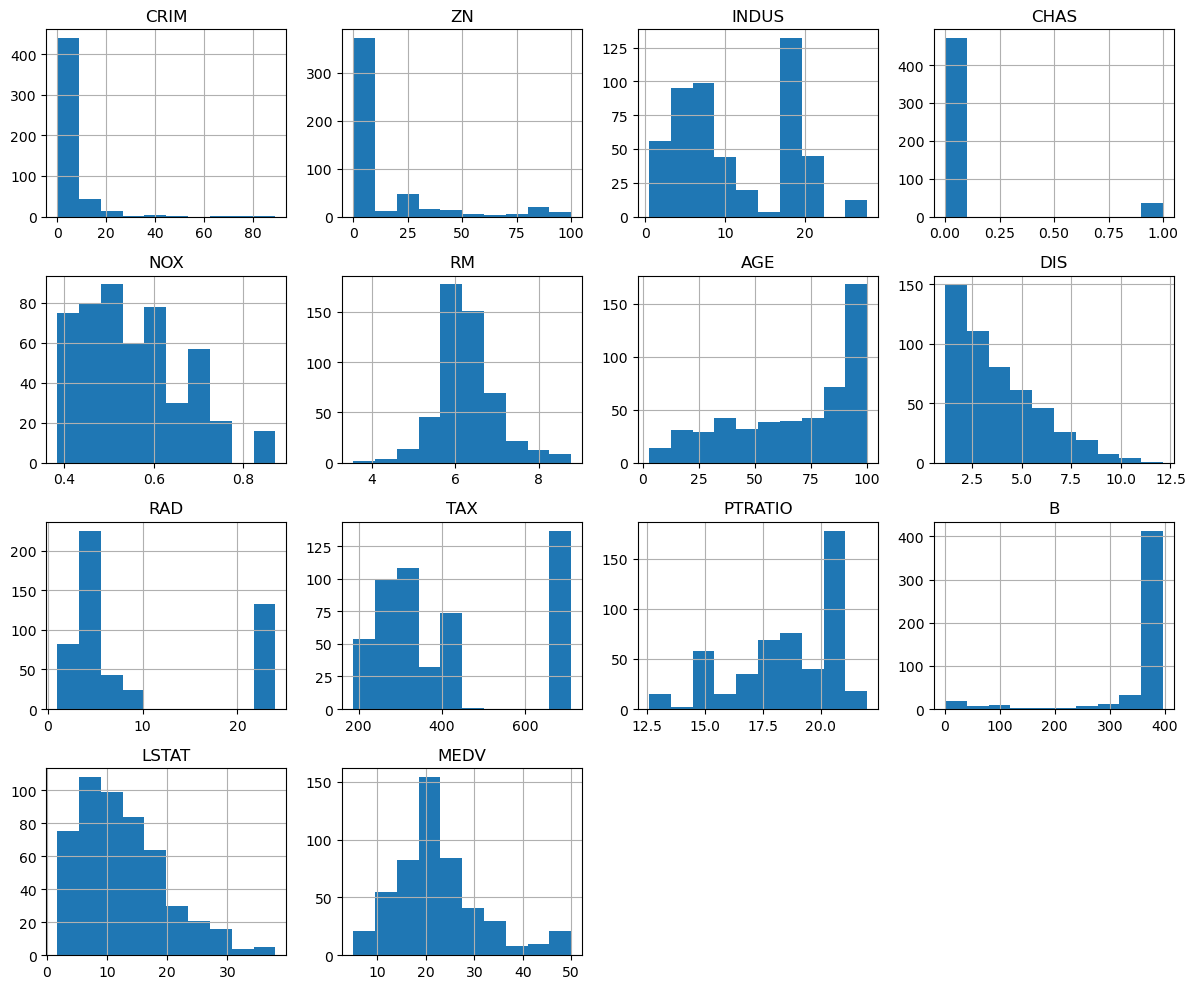

In [4]:
import matplotlib.pyplot as plt

housing_data.hist(figsize=(12, 10))
plt.tight_layout();

A primera vista parece que solo RM puede tener una distribución normal.

A continuación se muestra un gráfico del tipo Q-Q, que es una herramienta utilizada para evaluar si los datos siguen una distribución normal. En este gráfico, los cuantiles esperados para una distribución normal se comparan con los cuantiles reales de los datos de cada variable. La línea diagonal roja representa la distribución perfecta de los datos si estos fueran normalmente distribuidos, mientras que la línea de puntos azul muestra la distribución real de los datos de cada variable. Si los puntos se ajustan aproximadamente a la línea diagonal, sugiere que los datos se distribuyen de manera normal. Desviaciones significativas de la línea diagonal pueden indicar que los datos no siguen una distribución normal.

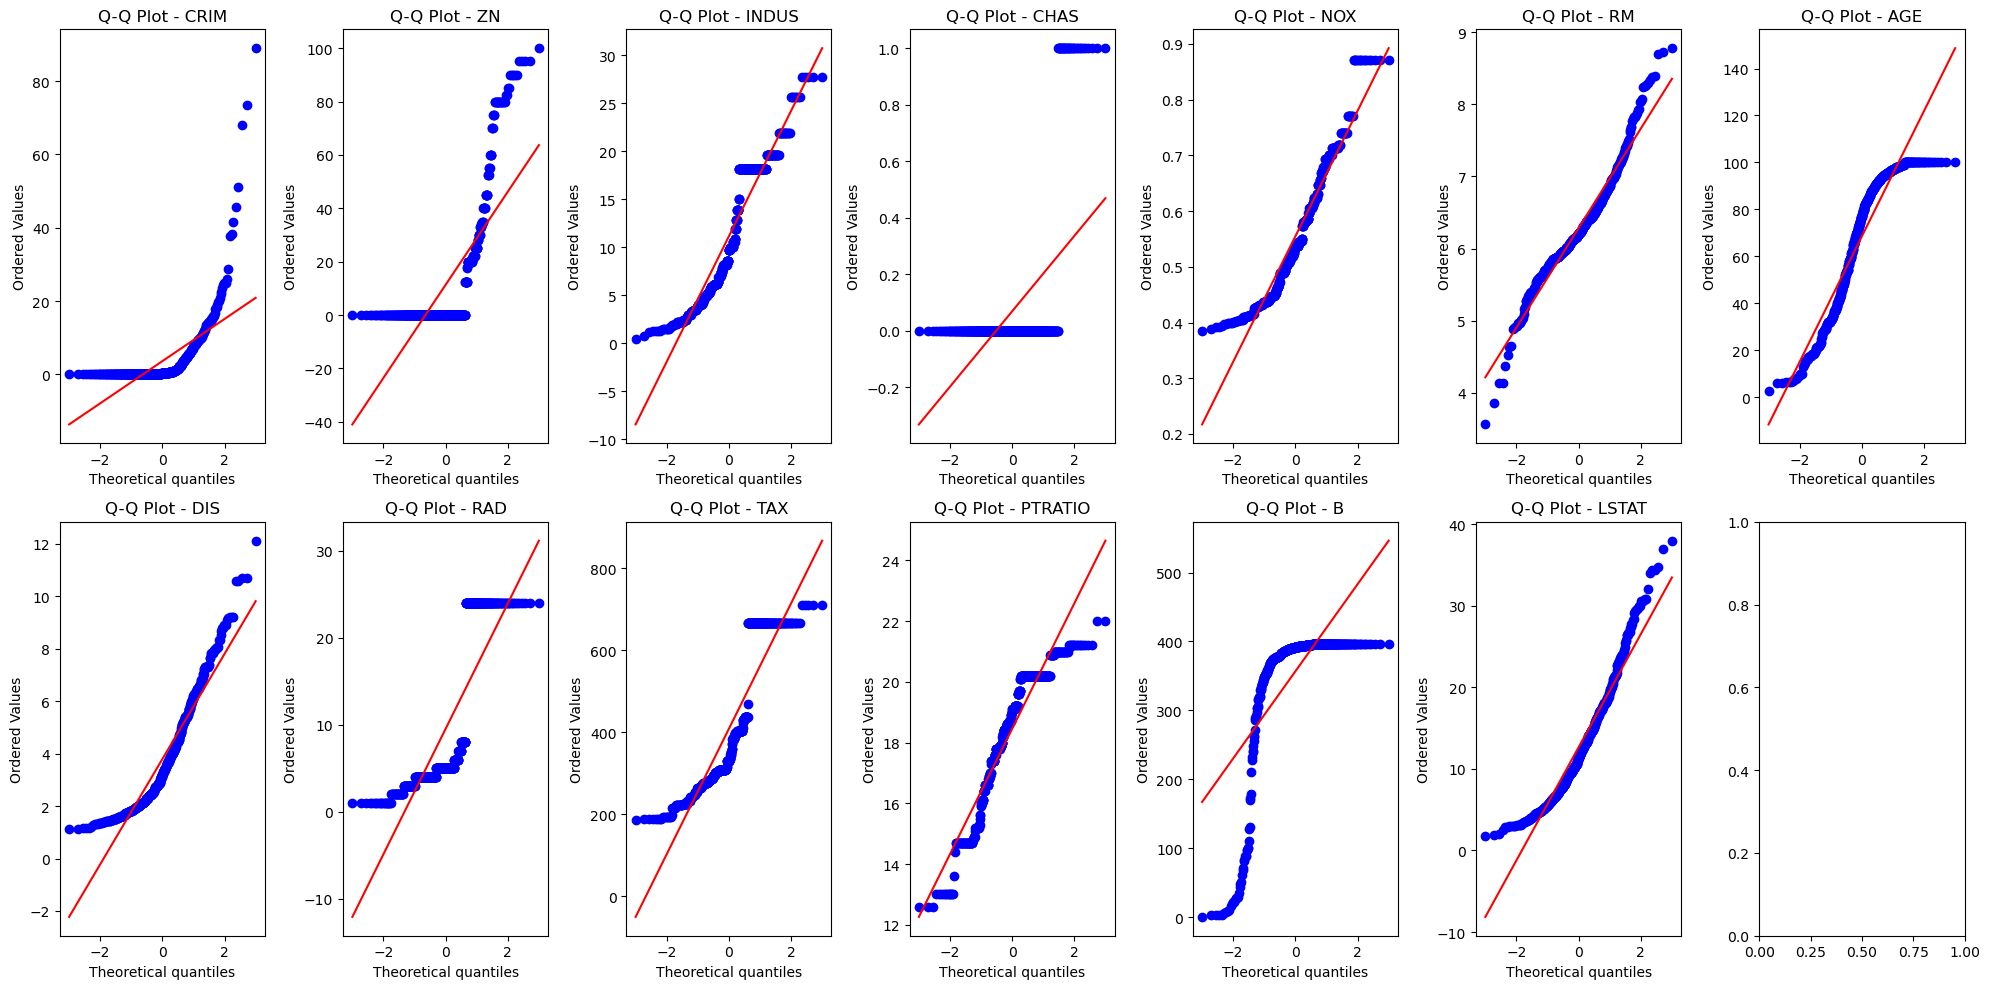

In [5]:
import scipy.stats as stats

n_rows = 2
n_cols = 7

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
for i, column in enumerate(housing_data_x.columns):
    row = i // n_cols  # Índice de fila
    col = i % n_cols   # Índice de columna
    stats.probplot(housing_data_x[column], plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q Plot - {column}')
plt.tight_layout();

El gráfico de RM es el que más se ajusta a una distribución normal ya que la linea azul está en gan parte sobre la linea roja y no hay grandes desviaciones. LSTAT también está en gran parte sobre la línea roja pero muestra una desviación más importante al principio del gráfico.
Otras como NOX, AGE, DIS y PTRATIO, también muestran una distribución cercana a la normal pero con desviaciones más significativas. 

Ahora muestro un gráfico de dispersión para ver la relación de cada característica con la variable objetivo.

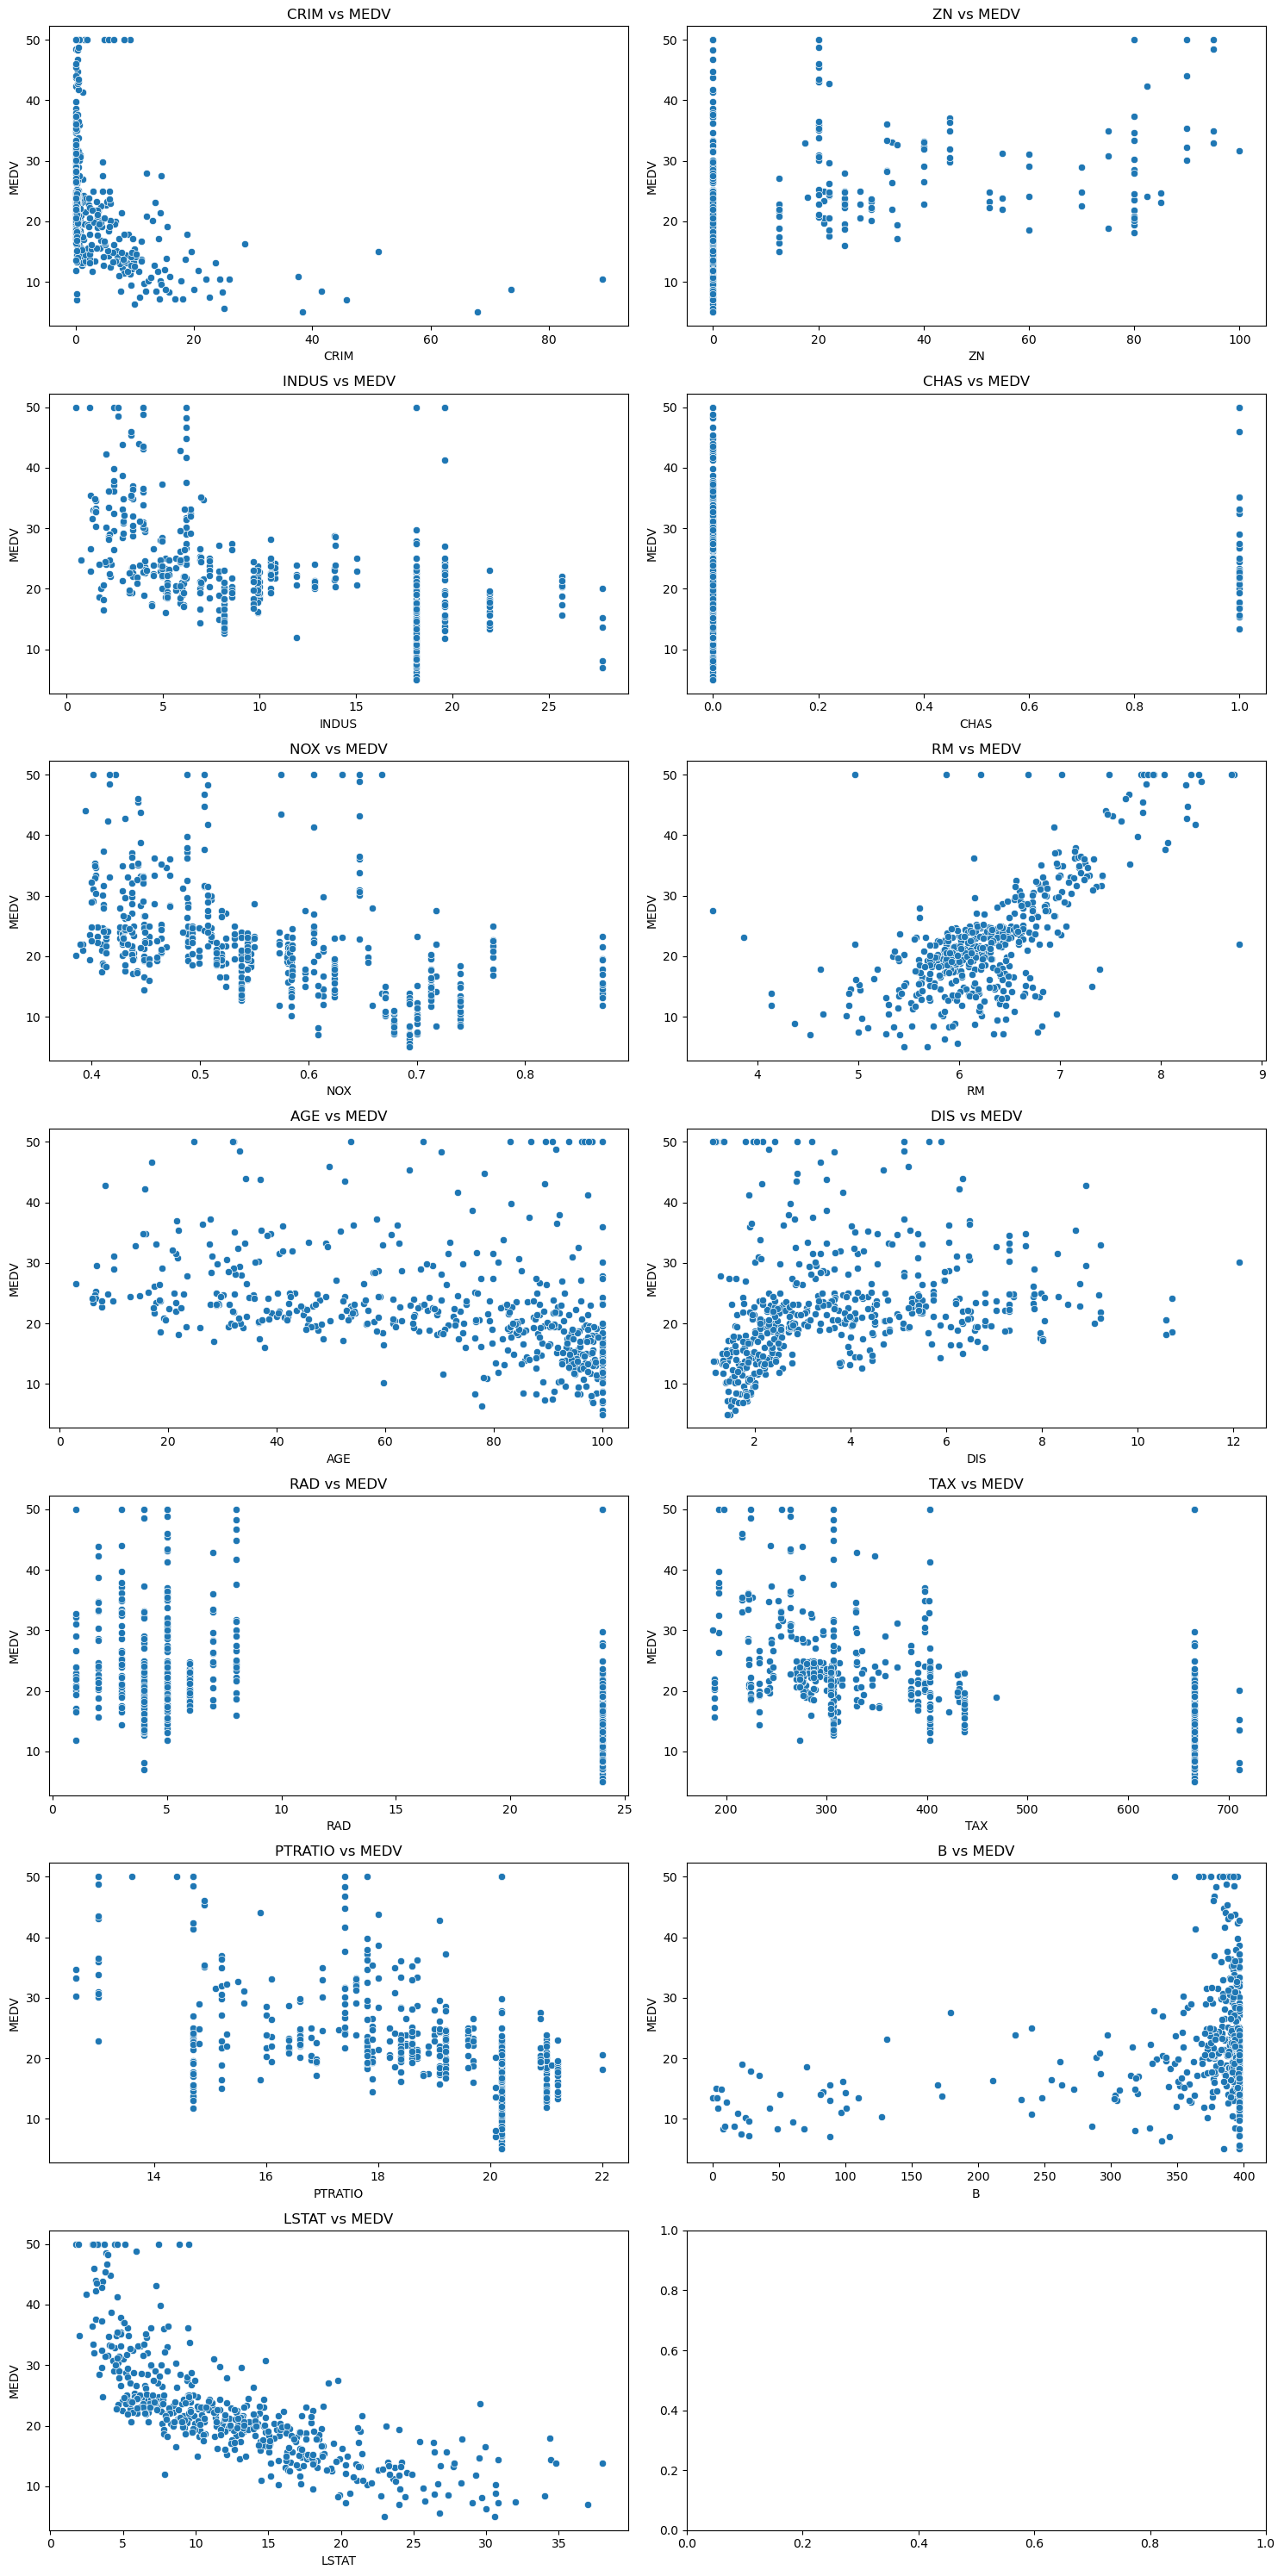

In [6]:
import seaborn as sns

n_rows = 7
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30)) 

for i, column in enumerate(housing_data_x.columns):
    row = i // n_cols  
    col = i % n_cols   
    sns.scatterplot(x=housing_data_x[column], y=housing_data_medv, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs MEDV')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('MEDV')

plt.tight_layout();

Estos gráficos muestran la relación de cada una de las características con la variable objetivo (precio medio de la vivienda, 'MEDV'). En el caso de LSTAT hay una relación lineal descendente. Esta variable se refiere a la población con el estatus socioeconómico más bajo, el precio baja a medida que sube la proporción de LSTAT.

Encontramos una relación lineal positiva entre RM que representa el número de habitacions por vivienda y el precio. El precio sube mientras más habitaciones tenga la vivienda. 

Con menor intensidad vemos una relación entre las zonas industrializadas (INDUS) y el precio, que disminuye en las zonas con más industria. Para la variable AGE (proporción de casas construidas antes de 1940) también vemos una relación en la que la mayoría de los inmuebles antiguos son más baratos.

También podemos encontrar otras relaciones que aunque no parezcan ser lineales, nos dan información interesante. En el caso de la variable B, que muestra la proporción de gente de raza negra, vemos que mucha gente se agrupa en una misma zona mientras que el resto esá muy disperso. No parece tener relación con el precio ya que vemos que la última parte del gráfico en x ocupa casi todo el rango que muestra MEDV en y. De una manera similar pero a la inversa tenemos el gráfico de CRIM. Aqui vemos como la mayoria de las zonas con criminalidad están en el rango de precios medios y bajos.

Ahora un mapa de calor mostrando las correlaciones.

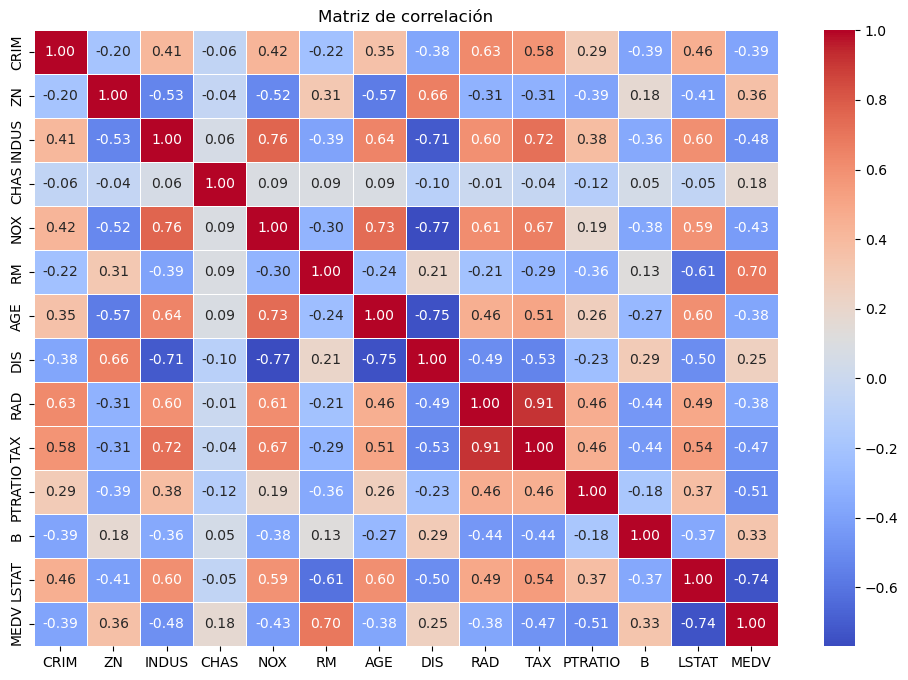

In [7]:
correlation_matrix = housing_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación");

Las variables que muestran más relación con la variable objetivo son RM y LSTAT. RM (número de habitaciones) tiene una correlación positiva, cuando sube el número de habitaciones también sube el precio. La variable LSTAT (porcentaje de población con estatus socioeconómico bajo) tiene una correlación negativa, si aumenta el porcentaje en LSTAT, baja el precio.

En el resto de variables, las correlaciones más fuertes se dan entre INDUS, NOX y DIS. 

Entre RAD y TAX tenemos una correlación de 0.91. Estas variables hacen referencia al indice de accesibilidad a las autopistas (RAD) y a la tasa de impuestos de cada vivienda (TAX). Esto podría indicar que las zonas con mejor accesibilidad a las autopistas tienen los impuestos más altos.

También hay una correlación positiva (0.76) entre INDUS y NOX. Estos conceptos se refieren a la proporción de zonas industriales (INDUS) y la proporción de óxidos de nitrógeno en el aire (NOX), lo que indica que en las zonas más industrializadas, el aire está más contaminado.

Entre DIS y NOX hay una correlación negativa de -0.75. La correlación negativa se da cuando al aumentar una variable, la otra disminuye. En este caso hace referencia nuevamente a la contaminación por óxidos de nitrógeno (NOX) y su relación con la variable DIS que nos indica la distancia de las diferentes áreas a los principales centros de trabajo de Boston. Aqui podemos interpretar que mientras menor es la distancia y más nos acercamos a los centros de trabajo, la contaminación sube. En otras palabras, cerca de los principales centros de trabajo hay más contaminación que lejos de ellos.   

Para acabar de confirmar las normalidades en las variables haremos el test Shapiro-Wilk.

In [8]:
from scipy.stats import shapiro

for column in housing_data_x.columns:
    stat, p_value = shapiro(housing_data_x[column])
    
    print(f'Variable: {column}')
    print(f'Estadístico de prueba: {stat}')
    print(f'Valor p: {p_value}')
    
    if p_value > 0.05:
        print('Los datos SI son consistentes con una distribución normal')
    else:
        print('Los datos NO son consistentes con una distribución normal')

Variable: CRIM
Estadístico de prueba: 0.44996464252471924
Valor p: 1.3285517473179391e-36
Los datos NO son consistentes con una distribución normal
Variable: ZN
Estadístico de prueba: 0.5559463500976562
Valor p: 7.882576753156324e-34
Los datos NO son consistentes con una distribución normal
Variable: INDUS
Estadístico de prueba: 0.8997918367385864
Valor p: 1.0642289039786765e-17
Los datos NO son consistentes con una distribución normal
Variable: CHAS
Estadístico de prueba: 0.274760365486145
Valor p: 2.3504399531659454e-40
Los datos NO son consistentes con una distribución normal
Variable: NOX
Estadístico de prueba: 0.9356358051300049
Valor p: 5.775830253526917e-14
Los datos NO son consistentes con una distribución normal
Variable: RM
Estadístico de prueba: 0.9608709812164307
Valor p: 2.4107271734408187e-10
Los datos NO son consistentes con una distribución normal
Variable: AGE
Estadístico de prueba: 0.8920136094093323
Valor p: 2.2308688889279508e-18
Los datos NO son consistentes con un

El test muestra que ninguna variable tiene una distribución normal.

Ahora paso a observar los outliers de las variables. 

In [9]:
Q1 = housing_data_x.quantile(0.25)
Q3 = housing_data_x.quantile(0.75)
IQR = Q3 - Q1

outliers = ((housing_data_x < (Q1 - 1.5 * IQR)) | (housing_data_x > (Q3 + 1.5 * IQR))).any(axis=0)

print("Variables con outliers en x_train:")
print(outliers[outliers == True])

Variables con outliers en x_train:
CRIM       True
ZN         True
CHAS       True
RM         True
DIS        True
PTRATIO    True
B          True
LSTAT      True
dtype: bool


Paso a la estandarización usando RobustScaler para las variables con outliers y MinMaxScaler para las que no tienen. 

En este paso excluimos las variables categóricas CHAS y RAD y convierto RAD en columnas dummy. No convierto CHAS al ser binaria. Tras la conversion elimino la coluna original RAD y una de las dummy para evitar la multicolinealidad. Para finalizar vuelvo a añadir las variables categóricas ya transformadas al nuevo df escalado.

In [10]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

variables_robust = ['CRIM', 'ZN', 'RM', 'DIS','PTRATIO','B', 'LSTAT']
variables_minmax = ['INDUS', 'NOX', 'AGE', 'TAX']

housing_data_x_robust = robust_scaler.fit_transform(housing_data_x[variables_robust])
housing_data_x_minmax = minmax_scaler.fit_transform(housing_data_x[variables_minmax])

housing_data_x_robust_df = pd.DataFrame(housing_data_x_robust, columns=variables_robust)
housing_data_x_minmax_df = pd.DataFrame(housing_data_x_minmax, columns=variables_minmax)

housing_data_x_scaled = pd.concat([housing_data_x_robust_df, housing_data_x_minmax_df], axis=1)
housing_data_x_scaled[['CHAS', 'RAD']] = housing_data_x[['CHAS', 'RAD']]

dummy_columns = pd.get_dummies(housing_data_x_scaled['RAD'], prefix='RAD')
dummy_columns = dummy_columns.drop(columns=dummy_columns.columns[0])

housing_data_x_scaled = pd.concat([housing_data_x_scaled.drop(columns=['RAD']), dummy_columns], axis=1)

housing_data_x_scaled

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX,CHAS,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.496612,0.285777,-1.339286,0.261902,-0.637681,0.067815,0.314815,0.641607,0.208015,0,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.287940,0.569789,-0.446429,0.261902,-0.221889,0.242302,0.172840,0.782698,0.104962,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,1.323171,0.569789,-0.446429,0.066675,-0.732634,0.242302,0.172840,0.599382,0.104962,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,1.069783,0.924391,-0.125000,0.153016,-0.841579,0.063050,0.150206,0.441813,0.066794,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,1.271680,0.924391,-0.125000,0.261902,-0.602699,0.063050,0.150206,0.528321,0.066794,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.521003,-0.236007,0.696429,0.026382,-0.168916,0.420455,0.386831,0.681771,0.164122,0,0,0,0,0,0,0,0,0
502,-0.058759,0.00,-0.119919,-0.297887,0.696429,0.261902,-0.227886,0.420455,0.386831,0.760041,0.164122,0,0,0,0,0,0,0,0,0
503,-0.054450,0.00,1.039973,-0.336744,0.696429,0.261902,-0.571714,0.420455,0.386831,0.907312,0.164122,0,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.793360,-0.265053,0.696429,0.096414,-0.487756,0.420455,0.386831,0.889804,0.164122,0,0,0,0,0,0,0,0,0


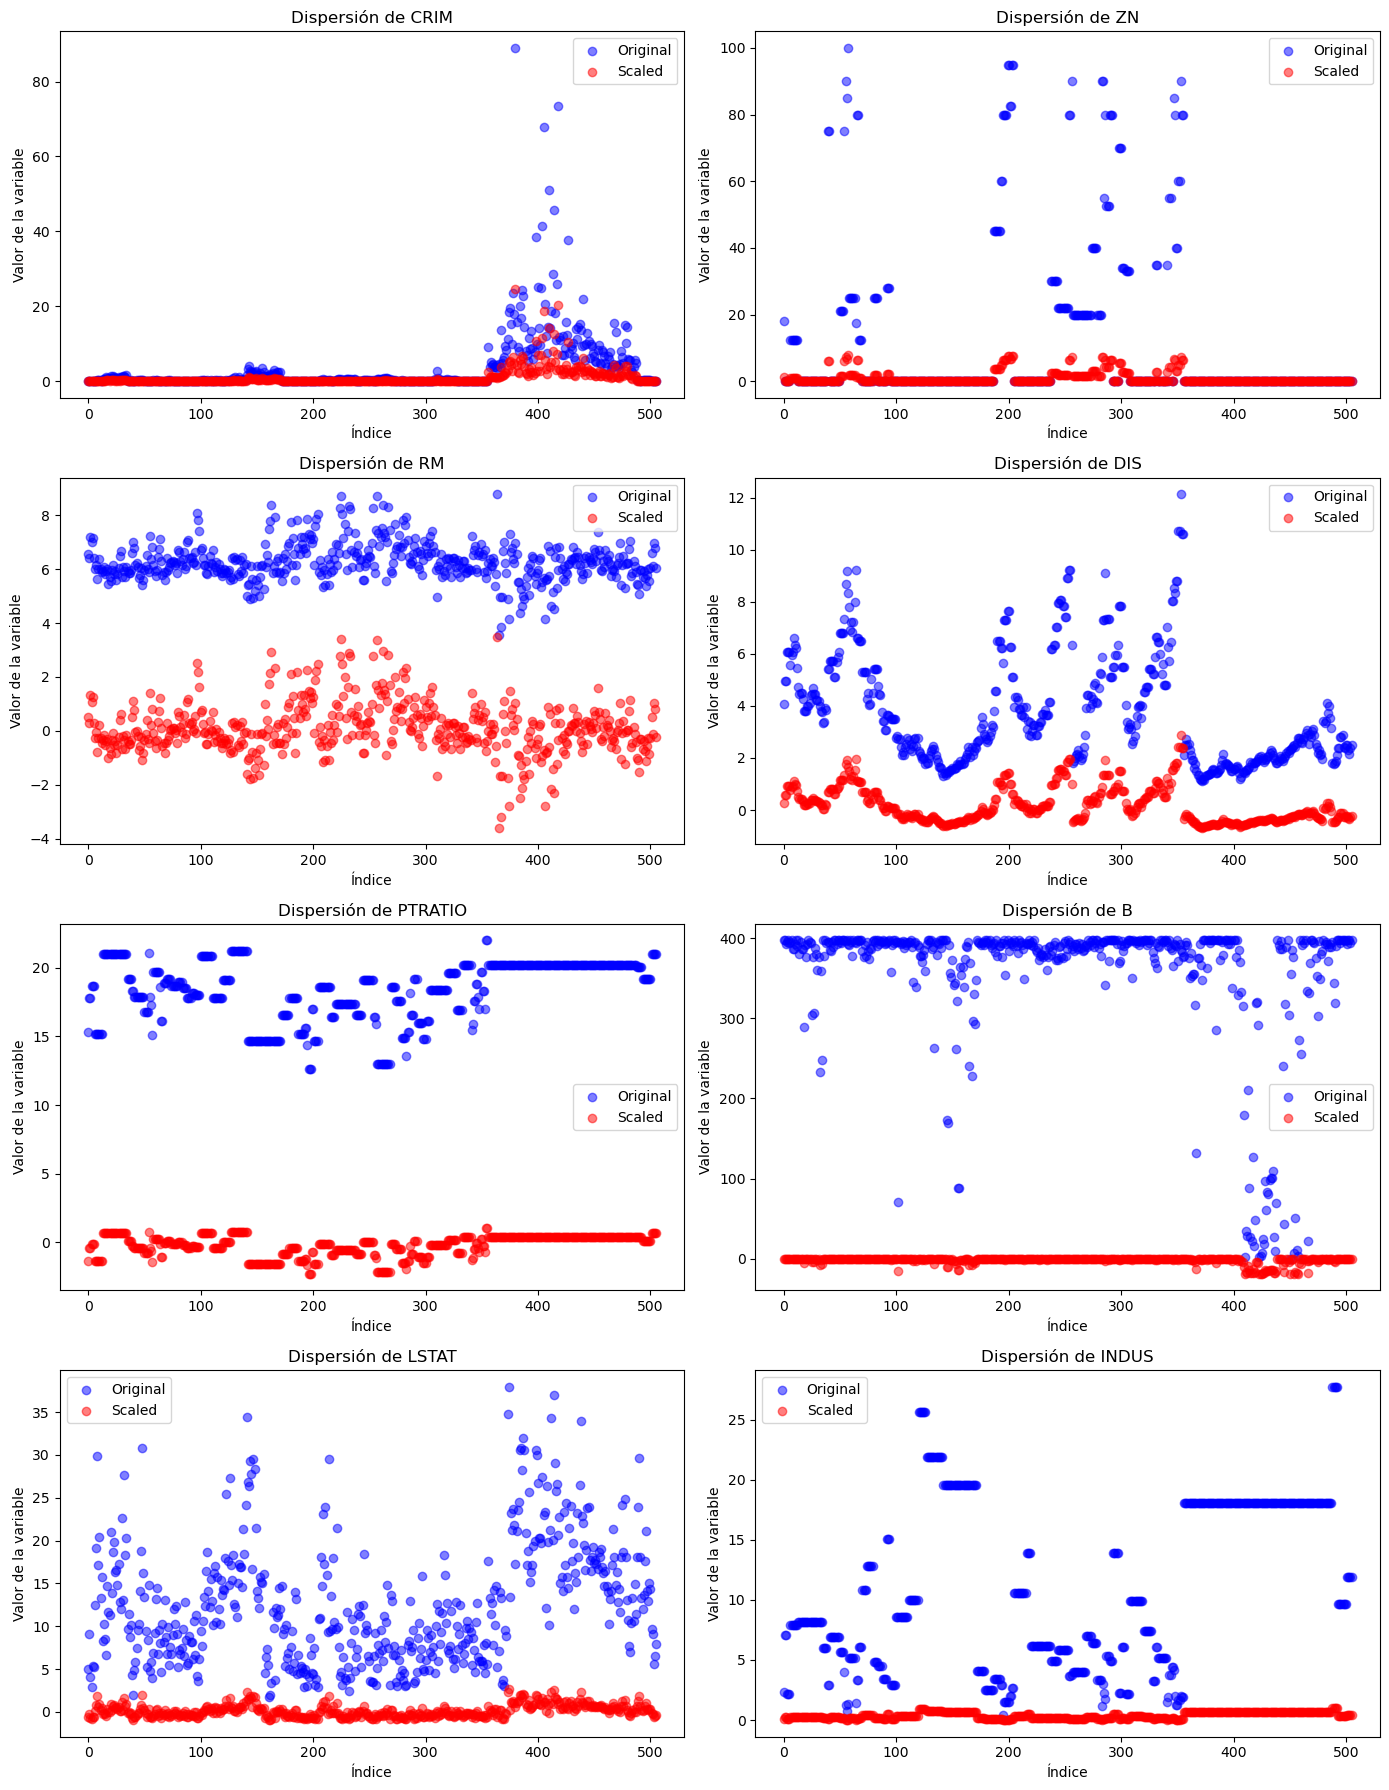

In [11]:
fig, axes = plt.subplots(4,2, figsize=(14, 18))

for i, variable in enumerate(variables_robust + variables_minmax):
    row = i // 2
    col = i % 2  
    
    if row < 4 and col < 2:
        axes[row, col].scatter(range(len(housing_data_x)), housing_data_x[variable], alpha=0.5, color='blue', label='Original')
        axes[row, col].scatter(range(len(housing_data_x_scaled)), housing_data_x_scaled[variable], alpha=0.5, color='red', label='Scaled')
        axes[row, col].set_title(f'Dispersión de {variable}')
        axes[row, col].set_xlabel('Índice')
        axes[row, col].set_ylabel('Valor de la variable')
        axes[row, col].legend()

plt.tight_layout();

Estos gráficos muestran la dispersión de las variables antes y después de la transformación. En rojo se muestra la variable transformada y se puede apreciar como los datos están más concentrados y con menos valores atípicos. 

El siguiente paso es separar el conjunto en train y test. Aqui usaré el df creado en el paso anterior, y el df que contiene la variable objetivo creado en el primer paso.

In [12]:
from sklearn.model_selection import train_test_split

X = housing_data_x_scaled
y = housing_data_medv  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora entrenamos el conjunto con un modelo de regresión lineal múltiple.

In [13]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_linear = model_lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_linear = r2_score(y_test, y_pred_linear)

mse_linear = mean_squared_error(y_test, y_pred_linear)

mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Coeficiente de determinación (R^2) del modelo Regresión Lineal Múltiple:", r2_linear)
print("Error cuadrático medio (MSE) del modelo Regresión Lineal Múltiple:", mse_linear)
print("Error absoluto medio (MAE) del modelo Regresión Lineal Múltiple:", mae_linear)

Coeficiente de determinación (R^2) del modelo Regresión Lineal Múltiple: 0.6615687658684817
Error cuadrático medio (MSE) del modelo Regresión Lineal Múltiple: 24.81844273848125
Error absoluto medio (MAE) del modelo Regresión Lineal Múltiple: 3.3070847636664573


El coeficiente de determinación (R²) es 0.66, lo que significa que aproximadamente el 66% de la variabilidad en la variable objetivo se explica por las características utilizadas en el modelo. El error cuadrático medio (MSE) es 24.82, lo que sugiere que, en promedio, las predicciones del modelo difieren en 24.82 puntos al cuadrado del valor real. Por último, el error absoluto medio (MAE) es 3.31, lo que significa que, en promedio, las predicciones del modelo difieren en 3.31 unidades del valor real. 

Parece que el modelo tiene una puntuación aceptable en el coeficiente de determinación, pero falla en cuanto a los errores, sobretodo en el MSE.

Ahora entrenamos el conjunto con el modelo Random Forest.

In [15]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor( random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [16]:
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Coeficiente de determinación (R^2) del modelo Random Forest:", r2_rf)
print("Error cuadrático medio (MSE) del modelo Random Forest:", mse_rf)
print("Error absoluto medio (MAE) del modelo de Random Forest:", mae_rf)

Coeficiente de determinación (R^2) del modelo Random Forest: 0.8891343682855674
Error cuadrático medio (MSE) del modelo Random Forest: 8.130196196078431
Error absoluto medio (MAE) del modelo de Random Forest: 2.0224313725490193


En este caso, el coeficiente de determinación (R²) es 0.89, lo que significa que aproximadamente el 89% de la variabilidad en la variable objetivo se explica por las características del conjunto. El error cuadrático medio (MSE) es 8.13, lo que sugiere que en promedio, las predicciones del modelo difieren en 8.13 puntos al cuadrado del valor real. El error absoluto medio (MAE) es 2.02, las predicciones del modelo difieren en 2.02 unidades del valor real. 

Este modelo funciona mucho mejor ya que tiene un valor en R² alto y errores relativamente bajos. Esto sugiere un buen rendimiento del modelo en la predicción.

# Ejercicio 2

Compáralos en base al MSE y al R2.

El modelo de Random Forest tiene un R² más alto (0.89) que la Regresión Lineal Múltiple (0.66), lo que indica que RF tiene una mejor capacidad para explicar la variabilidad en los datos. 

El MSE de Random Forest (8.13) es significativamente menor que el de la Regresión Lineal Múltiple (24.82), lo que sugiere una mayor precisión en las predicciones.

Muestro una representación gráfica de la comparación entre ambos modelos usando un gráfico de residuos.

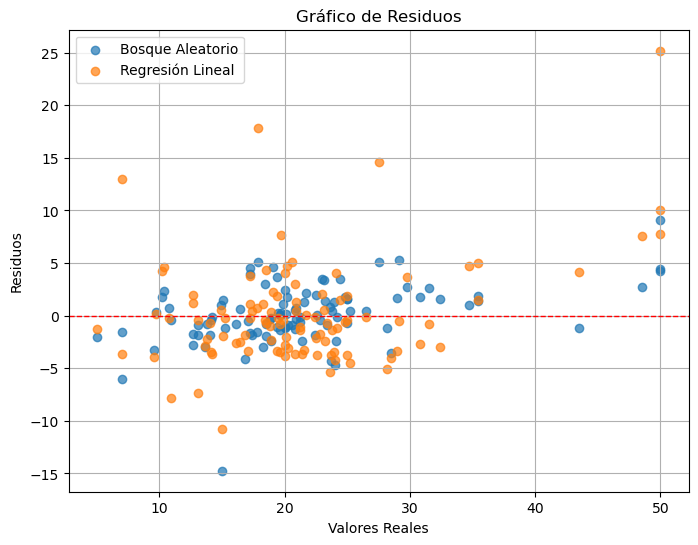

In [17]:
residuals_rf = y_test - y_pred_rf
residuals_linear = y_test - y_pred_linear

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_rf, label="Bosque Aleatorio", alpha=0.7)
plt.scatter(y_test, residuals_linear, label="Regresión Lineal", alpha=0.7)

plt.axhline(y=0, color="red", linestyle="--", linewidth=1)

plt.xlabel("Valores Reales")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.legend()
plt.grid(True);

En este tipo de gráfico el resultado de un modelo perfecto serían todos los valores sobre la linea de 0 residuos. En este caso vemos que los puntos azules estan mas cercanos a la línea del cero mientras que los naranjas son mucho más dispersos. 

De una manera visual podemos concluir que el modelo Random Forest es más preciso que la regresión lineal para este conjunto de datos.

# Ejercicio 3

Entrénalos utilizando los diferentes parámetros que admiten para intentar mejorar la predicción.

Vamos a buscar los mejores parámetros para el modelo de regresión lineal múltiple con el método Grid Search.

In [18]:
model_lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [19]:
from sklearn.model_selection import GridSearchCV

parameters_lr = {'copy_X': [True,False], 'fit_intercept': [True,False], 'n_jobs': [None,-1,1,2,5,10], 'positive': [False,True]}

grid_search = GridSearchCV(model_lr, parameters_lr, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

best_model = LinearRegression(**grid_search.best_params_)

best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_best)
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y_test, y_pred_best)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 24.81844273848125
Coeficiente de determinación (R^2): 0.6615687658684817


En este primer modelo los valores por omisión de los parámetros con los mejores parámetros de este modelo.

Ahora paso a buscar los parámetros del modelo Random Forest.

In [21]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid )

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación (neg_mean_squared_error):")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor puntuación (neg_mean_squared_error):
0.858049319943716


Ahora creo el modelo añadiendo los mejores parámetros encontrados en la celda anterior y lo vuelvo a entrenar. Para evaluar el rendimiento, añado las métricas de MSE y R2. 

In [23]:
best_model_rf = RandomForestRegressor(**grid_search.best_params_)
best_model_rf.fit(X_train, y_train)

y_pred_best_rf = best_model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_best_rf)
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y_test, y_pred_best_rf)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 10.479238236384836
Coeficiente de determinación (R^2): 0.8571021733124686


Los resultados del modelo son bastante buenos. Ahora pruebo con XGBoost para comparar. 

In [24]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [26]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 0.8]
    }

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid)

grid_search_xgb.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)

print("Mejor puntuación (neg_mean_squared_error) para XGBoost:")
print(grid_search_xgb.best_score_)

Mejores hiperparámetros encontrados para XGBoost:
{'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mejor puntuación (neg_mean_squared_error) para XGBoost:
0.8611307354311432


In [27]:
best_model_xgb = xgb.XGBRegressor(**grid_search_xgb.best_params_)

best_model_xgb.fit(X_train, y_train)

y_pred_best_xgb = best_model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
print("Error cuadrático medio (MSE) para XGBoost:", mse_xgb)

r2_xgb = r2_score(y_test, y_pred_best_xgb)
print("Coeficiente de determinación (R^2) para XGBoost:", r2_xgb)

Error cuadrático medio (MSE) para XGBoost: 6.942315850111333
Coeficiente de determinación (R^2) para XGBoost: 0.9053326372794107


El modelo que mejores resultados ofrece es XGBoost.

# Ejercicio 4

Compara el rendimiento usando la aproximación traint/test o utilizando todos los datos (validacióm interna).

In [28]:
from sklearn.model_selection import cross_val_score

scores_best_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='r2')
mse_scores_best_rf = -cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mae_scores_best_rf = -cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

r2_cv_best_rf = scores_best_rf.mean()
r2_std_best_rf = scores_best_rf.std()
mse_cv_best_rf = mse_scores_best_rf.mean()
mse_std_best_rf = mse_scores_best_rf.std()
mae_cv_best_rf = mae_scores_best_rf.mean()
mae_std_best_rf = mae_scores_best_rf.std()

scores_best_xgb = cross_val_score(best_model_xgb, X, y, cv=5, scoring='r2')
mse_scores_best_xgb = -cross_val_score(best_model_xgb, X, y, cv=5)
mae_scores_best_xgb = -cross_val_score(best_model_xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

r2_cv_best_xgb = scores_best_xgb.mean()
r2_std_best_xgb = scores_best_xgb.std()
mse_cv_best_xgb = mse_scores_best_xgb.mean()
mse_std_best_xgb = mse_scores_best_xgb.std()
mae_cv_best_xgb = mae_scores_best_xgb.mean()
mae_std_best_xgb = mae_scores_best_xgb.std()

mse_cv_best_xgb_positive = -mse_cv_best_xgb


print("Random Forest (Cross-Validation):")
print("R^2 Mean:", r2_cv_best_rf)
print("R^2 Std:", r2_std_best_rf)
print("MSE Mean:", mse_cv_best_rf)
print("MSE Std:", mse_std_best_rf)
print("MAE Mean:", mae_cv_best_rf)
print("MAE Std:", mae_std_best_rf)
print("\nXGBoost (Cross-Validation):")
print("R^2 Mean:", r2_cv_best_xgb)
print("R^2 Std:", r2_std_best_xgb)
print("MSE Mean:", mse_cv_best_xgb_positive)
print("MSE Std:", mse_std_best_xgb)
print("MAE Mean:", mae_cv_best_xgb)
print("MAE Std:", mae_std_best_xgb)

Random Forest (Cross-Validation):
R^2 Mean: 0.8475618592680343
R^2 Std: 0.04789002079790395
MSE Mean: 13.0624394135086
MSE Std: 3.1642914367336883
MAE Mean: 2.272489614197531
MAE Std: 0.11845700246530035

XGBoost (Cross-Validation):
R^2 Mean: 0.6850498235989909
R^2 Std: 0.15352672392183034
MSE Mean: 0.6850498235989909
MSE Std: 0.15352672392183034
MAE Mean: 2.3307449648115375
MAE Std: 0.1738390088822919


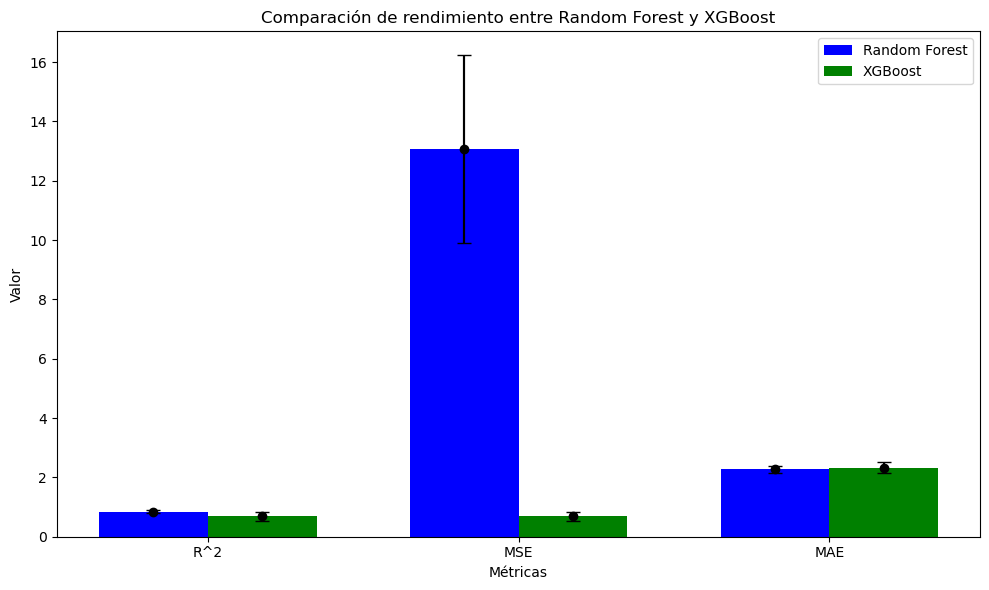

In [30]:
import numpy as np
import matplotlib.pyplot as plt

model_labels = ['Random Forest', 'XGBoost']
metrics = ['R^2', 'MSE', 'MAE']
means = np.array([[r2_cv_best_rf, mse_cv_best_rf, mae_cv_best_rf], [r2_cv_best_xgb, mse_cv_best_xgb_positive, mae_cv_best_xgb]])
stds = np.array([[r2_std_best_rf, mse_std_best_rf, mae_std_best_rf], [r2_std_best_xgb, mse_std_best_xgb, mae_std_best_xgb]])

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

index = np.arange(len(metrics))

bar_rf = ax.bar(index - bar_width/2, means[0], bar_width, yerr=stds[0], capsize=5, label='Random Forest', color='b')
bar_xgb = ax.bar(index + bar_width/2, means[1], bar_width, yerr=stds[1], capsize=5, label='XGBoost', color='g')

for i in range(len(metrics)):
    ax.errorbar(index[i] - bar_width/2, means[0][i], yerr=stds[0][i], fmt='o', color='black')
    ax.errorbar(index[i] + bar_width/2, means[1][i], yerr=stds[1][i], fmt='o', color='black')

ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de rendimiento entre Random Forest y XGBoost')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout();

La validación cruzada muestra mejores resultados para el modelo Random Forest.

# Ejercicio 5

No utilices la variable referente al número de habitaciones (RM) para hacer las predicciones.

Primero excluyo la columna RM del dataset.

In [34]:
X_new = housing_data_x_scaled.drop(columns=['RM'])
y = housing_data_medv  

X_new_train, X_new_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para este ejercicio utilizo el modelo con mejores resultados según la validación cruzada que en este caso ha sido Random Forest.

In [35]:
best_model_rf.fit(X_new_train, y_train)

y_pred_best_rf = best_model_rf.predict(X_new_test)

mse = mean_squared_error(y_test, y_pred_best_rf)
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y_test, y_pred_best_rf)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 8.465170292519057
Coeficiente de determinación (R^2): 0.8845665677166494


Los resultados son mejores si no tenemos en cuenta RM. Ahora tenemos un R2 de 0.88 cuando antes era de 0.86 y el MSE pasa de 10.48 a 8.46. Me parece sorprendente al ser una de las variables que más relacion tenia con la variable objetivo MEDV.